In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Modeling

In this step we'll load the cleaned data set and then perform the modeling steps.

In [6]:
# Load cleaned data from eda step
file_path = "../data/cleaned_diabetes_health_indicators_dataset.csv"
df = pd.read_csv(file_path)

In [8]:
# Perform Logistic Regression on the data set

# Numerical Predictors
# BMI
# MentHlth
# PhysHlth
# Age

# Categorical Predictors
# HighBP
# HighChol
# CholCheck
# Smoker
# Stroke
# HeartDiseaseorAttack
# PhysActivity
# Fruits
# Veggies
# HvyAlcoholConsump
# AnyHealthcare
# NoDocbcCost
# GenHlth
# DiffWalk
# Sex
# Education
# Income

# Target
# Diabetes_012

# Standardize Data
dependent_column = ["Diabetes_012"]
numerical_predictor_columns = ["BMI", "MentHlth", "PhysHlth", "Age"]

# Find Z-score of Numerical Predictors
Z_train = preprocessing.scale(df[numerical_predictor_columns])
Z_train = pd.DataFrame(Z_train, columns=numerical_predictor_columns)

# Create dummy vars
dummy_HighBP = pd.get_dummies(df["HighBP"], drop_first=True)
dummy_HighChol = pd.get_dummies(df["HighChol"], drop_first=True)
dummy_CholCheck = pd.get_dummies(df["CholCheck"], drop_first=True)
dummy_Smoker = pd.get_dummies(df["Smoker"] , drop_first=True)
dummy_Stroke = pd.get_dummies(df["Stroke"] , drop_first=True)
dummy_HeartDiseaseorAttack = pd.get_dummies(df["HeartDiseaseorAttack"] , drop_first=True)
dummy_PhysActivity = pd.get_dummies(df["PhysActivity"] , drop_first=True)
dummy_Fruits = pd.get_dummies(df["Fruits"] , drop_first=True)
dummy_Veggies = pd.get_dummies(df["Veggies"] , drop_first=True)
dummy_HvyAlcoholConsump = pd.get_dummies(df["HvyAlcoholConsump"] , drop_first=True)
dummy_AnyHealthcare = pd.get_dummies(df["AnyHealthcare"] , drop_first=True)
dummy_NoDocbcCost = pd.get_dummies(df["NoDocbcCost"] , drop_first=True)
dummy_GenHlth = pd.get_dummies(df["GenHlth"] , drop_first=True)
dummy_DiffWalk = pd.get_dummies(df["DiffWalk"] , drop_first=True)
dummy_Sex = pd.get_dummies(df["Sex"] , drop_first=True)
dummy_Education = pd.get_dummies(df["Education"] , drop_first=True)
dummy_Income = pd.get_dummies(df["Income"] , drop_first=True)

# Concatenate the standardized numerical features with the dummy vars
X = pd.concat([Z_train, dummy_HighBP, dummy_HighChol, dummy_CholCheck, dummy_Smoker, dummy_Stroke, dummy_HeartDiseaseorAttack,
                     dummy_PhysActivity, dummy_Fruits, dummy_Veggies, dummy_HvyAlcoholConsump, dummy_AnyHealthcare, dummy_NoDocbcCost,
                    dummy_GenHlth, dummy_DiffWalk, dummy_Sex, dummy_Education, dummy_Income], axis=1)
X.columns = X.columns.astype(str)
y = df[dependent_column]

# Do this to avoid warnings
y = y.values.ravel()

# Split data into training and test data after standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1337)

In [10]:
print(X.shape, y.shape)

(229781, 34) (229781,)


In [12]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [14]:
print(X_resampled.shape, y_resampled.shape)

(13887, 34) (13887,)


In [16]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
Complete = AgglomerativeClustering(metric='cosine', n_clusters=5, linkage='complete')
Complete.fit(X_resampled)
#print(Complete.labels_)

Complete = linkage(Complete.children_, method='complete')

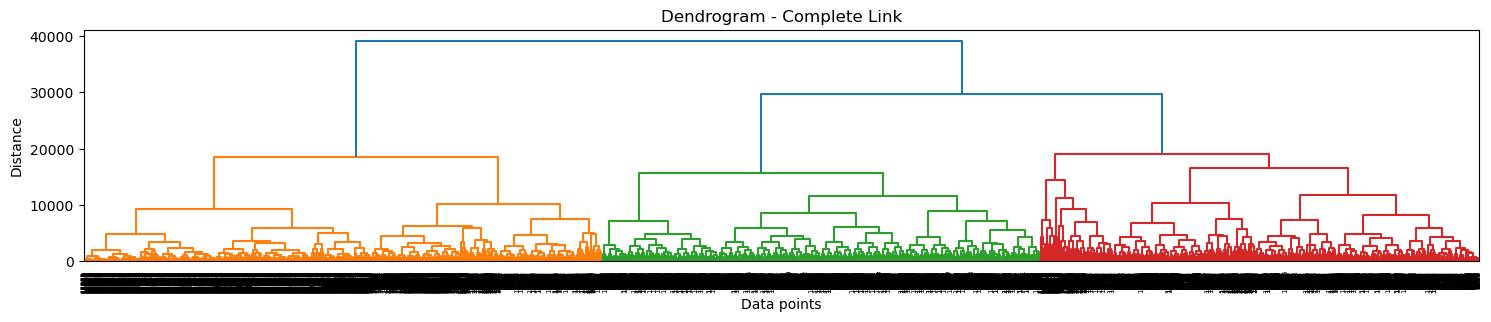

In [36]:
# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 3))

# Plot the dendrogram on subplots
dendrogram(Complete, ax=axes)

# Set titles and labels for subplots
axes.set_title('Dendrogram - Complete Link')
axes.set_xlabel('Data points')
axes.set_ylabel('Distance')


# Show the figure
plt.show()

In [142]:
from scipy.cluster.hierarchy import fcluster

# Cut the linkage into clusters using a distance threshold
distance_threshold = 10000
cluster_labels = fcluster(Complete, t=distance_threshold, criterion='distance')
unique_labels = np.unique(cluster_labels)
print(unique_labels)
print(cluster_labels.shape)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
(13886,)


In [144]:
from matplotlib.colors import ListedColormap
colors = ['red', 'green', 'blue', 'orange', 'yellow']
cmap = ListedColormap(colors)

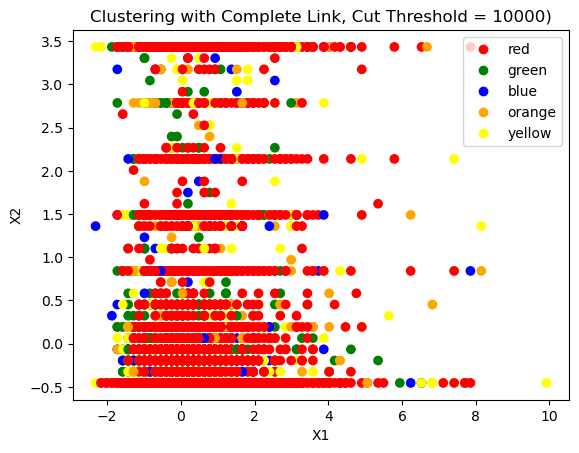

In [146]:
import matplotlib.pyplot as plt
plt.scatter(X_resampled.iloc[1:,0], X_resampled.iloc[1:,1], c=cluster_labels, cmap=cmap)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Clustering with Complete Link, Cut Threshold = 10000)')

legend_handles = [plt.Line2D([], [], marker='o', color=color, linestyle='None') for color in colors]
legend_labels = colors

# Create the legend
plt.legend(legend_handles, legend_labels)

plt.show()

(13886,)